# An Exploration into Prosper Loan Customers
## by (David Eruemu)

## Investigation Overview


> The Aim of this investigation is to provide insights into:
>1. The distribution of income ranges of customers
2.  The distribution of income ranges in each prosper rating


## Dataset Overview

 > This is an exploratory analyis of loan data from Prosper MarketPlace, a peer to peer lending industry. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
base_color = sb.color_palette()[0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What income range does the average customer fall into
from the graphic below, we can see that 30.3% of customers earn between `$25,000` and `$50,000` 

In [4]:
#replace '$0' with 'Not employed'
df['IncomeRange'].replace('$0','Not employed', inplace=True)
#create list of income ranges
incomerange = [ '$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', 'Not employed']
# change income ranges to categorical type
incomeclass = pd.api.types.CategoricalDtype(ordered=True, categories=incomerange)
df['IncomeRange'] = df['IncomeRange'].astype(incomeclass)

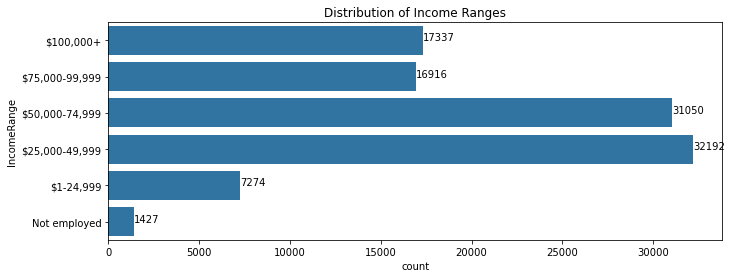

In [5]:
#plot bar chart
plt.figure(figsize=(11,4))
incomerange=df.IncomeRange.value_counts(sort=False)
plt.title('Distribution of Income Ranges')
sb.countplot(data=df, y='IncomeRange', color=base_color)
#include text on the bars by iterating through the values 
for i in range(incomerange.shape[0]):
    plt.text(incomerange[i], i, incomerange[i])

Judging from the visual below, we can tell that it's generally considered high risk to give out loans to unemployed customers. TheAA rating is also considerably rare seeing as it's the lowest rating in all the income ranges except $75,000 - $99,000 where it's only the second lowest and $100,000 where it's the 4th most common.

In [6]:
#create list of ratings in order
ratings = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
#change to categorical data type
ratingclass = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ratingclass)  

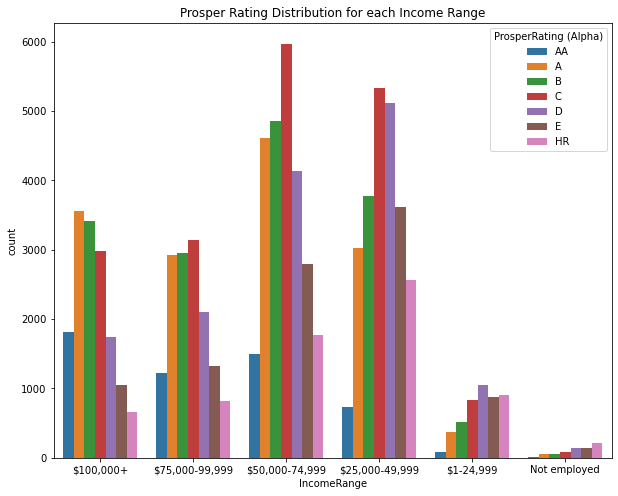

In [7]:
plt.figure(figsize = [10, 8])
plt.title('Prosper Rating Distribution for each Income Range')
sb.countplot(data = df,x='IncomeRange' ,hue ='ProsperRating (Alpha)');

## What's the relationship between Income range and Loan original amount

The facet plot below shows the relationship between Income Range and the Loan Original Amount.
The larger spread of the distribution of loan original amount as the Income range increases. The median loan amount increases asthe income range increases

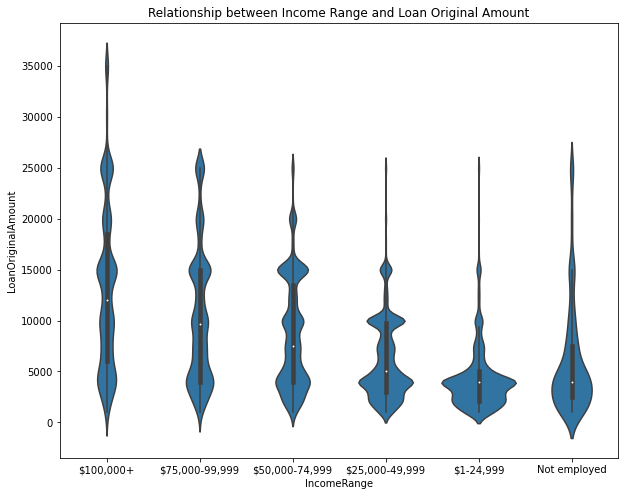

In [8]:
plt.figure(figsize=[10,8])
sb.violinplot(data=df, x = 'IncomeRange', y ='LoanOriginalAmount', color = base_color);
plt.title('Relationship between Income Range and Loan Original Amount');

## What is the distribution of customer's debt to income ratio
Most of the customers have debt to income ratios that fall between 0 and 0.5. There are a large range of outliers from 1 to 10.1

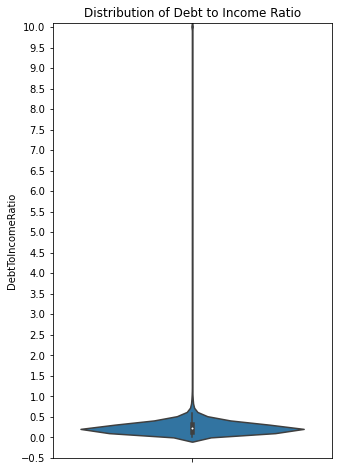

In [9]:
#creat mask to exclude 'Not employed due to the large number of outliers'
employedmask=df['IncomeRange']!='Not employed'
plt.figure(figsize=(5,8))
sb.violinplot(data=df[employedmask], y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.yticks(np.arange(-0.5, 10.01, 0.5))
plt.ylim(-0.5,10.1);
plt.title('Distribution of Debt to Income Ratio');

The plots below show the relationships between a customers's debt to income ratio and the prosper rating and income range.
The median Debt to Income Ratio slightly increases as the income range decreases.The standard deviiation also increases as the income range decreases. The $75,000-$99,999 range has the smallest spread
The median Debt to income ratio is similar across prosper ratings. The major difference is the distribution. The kernels become more triangular and the standard deviation decreases as the rating increases


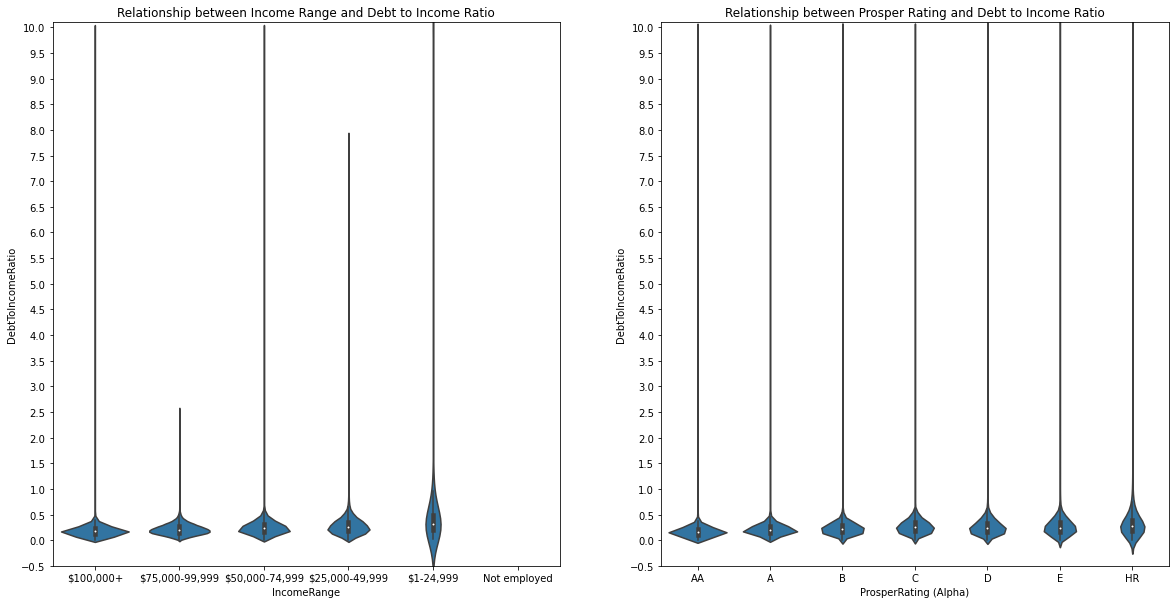

In [10]:

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
sb.violinplot(data=df[employedmask], x = 'IncomeRange', y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.yticks(np.arange(-1, 10.01, 0.5))
plt.ylim(-0.5,10.1)
plt.title('Relationship between Income Range and Debt to Income Ratio');

plt.subplot(1,2,2)
sb.violinplot(data=df[employedmask], x = 'ProsperRating (Alpha)', y ='DebtToIncomeRatio', color = sb.color_palette()[0])
plt.yticks(np.arange(-0.5, 10.01, 0.5))
plt.ylim(-0.5,10.1)
plt.title('Relationship between Prosper Rating and Debt to Income Ratio');

## What are customers taking out loans for?

The plot below show the distribution of purposes for the loans taken out. A whooping 51% of loans are taken out for debt consolidation.

In [11]:
df['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                      ['Not Available', 'Debt Consolidation','Home Improvement','Business',
                                                       'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                       'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                       'Large Purchases','Medical/Dental','Motorcycle','RV', 'Taxes','Vacation',
                                                       'Wedding Loans'], inplace=True)

In [12]:
listcategory =  ['Debt Consolidation','Home Improvement','Business',
                                                       'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                       'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                       'Large Purchases','Medical/Dental','Motorcycle','RV', 'Taxes','Vacation',
                                                       'Wedding Loans']
categoryclass = pd.api.types.CategoricalDtype(ordered=False, categories = listcategory)
df['ListingCategory (numeric)']=df['ListingCategory (numeric)'].astype(categoryclass)

In [13]:
df.rename(columns={"ListingCategory (numeric)":"ListingCategory"},inplace=True)

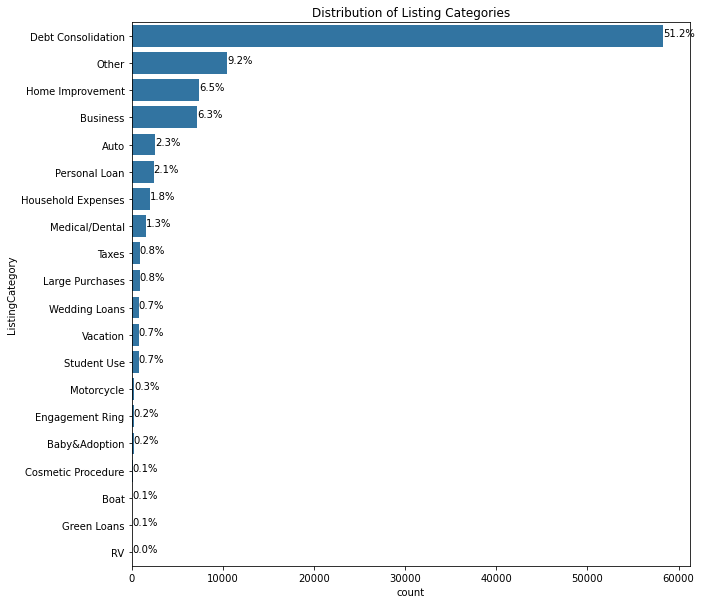

In [14]:
plt.figure(figsize=(10,10))
size=df['ListingCategory'].shape[0]
categories=df['ListingCategory'].value_counts()
plt.title('Distribution of Listing Categories')
sb.countplot(data = df, y='ListingCategory', order = categories.index, color = base_color)
for i in range(categories.shape[0]):
    plt.text(categories[i], i, str(format(categories[i]/size*100,'.1f'))+'%')

In [15]:
counts = df.groupby(['IncomeRange', 'ListingCategory']).size()
counts = counts.reset_index(name='count')
sums=counts.groupby('IncomeRange').sum()
counts = counts.pivot(index = 'IncomeRange', columns = 'ListingCategory', values = 'count')
counts = pd.concat([counts,sums], axis=1)
counts = counts.iloc[:,:-1].div(counts['count']/100, axis=0)

This graphic has a lot about it but i'll focus on the three most obvious. The frequency of loans taken out for debt consolidation and home improvement increases with the income range while the frequency of loans taken out for household expenses and personal loans decreases. The frequency of business loans increases with the income range with an exception for the unemployed.

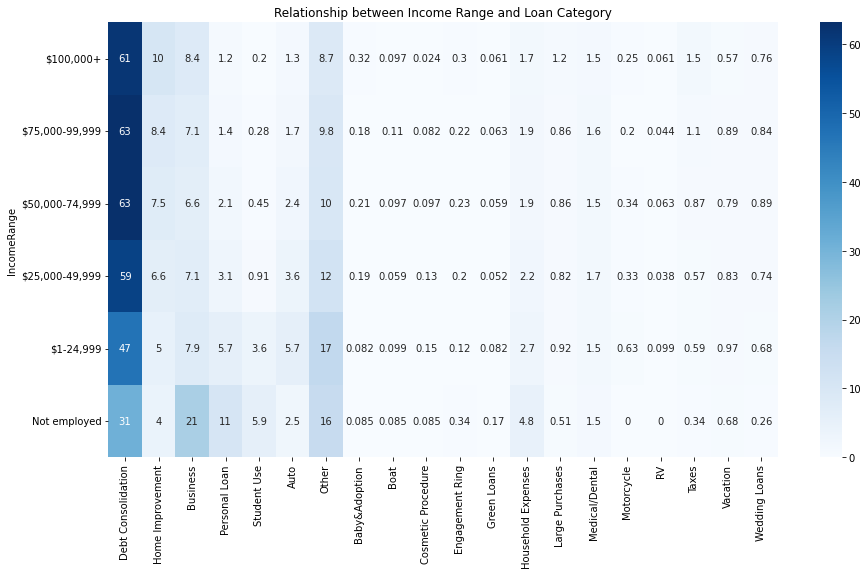

In [16]:
plt.figure(figsize=(15,8))
plt.title('Relationship between Income Range and Loan Category')
sb.heatmap(counts, annot = True, cmap = "Blues");

In [17]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 585690 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\David Eruemu\.conda\envs\jupiter\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\David Eruemu\.conda\envs\jupiter\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\David Eruemu\.conda\envs\jupiter\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\David Eruemu\.conda\envs\jupiter\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks(